# <span style="color:blue"> MBA em Ciência de Dados</span>
# <span style="color:blue">Técnicas Avançadas para Captura e Tratamento de Dados</span>

## <span style="color:blue"> Matriz Documento $\times$ Palavras - Bag of Words</span>
**Material Produzido por Luis Gustavo Nonato**<br>
**Cemeai - ICMC/USP São Carlos**
---

---
## Conteúdo
- Introdução
- Pré-processamento
    - Extração de palavras
    - Limpesa de símbolos
    - Stemming
- Construção da Matriz Documentos $\times$ Palavras
    - TF-IDF
    - Remoção das palavras mais e menos frequentes
    
**Bibliografia**
- https://www.nltk.org/book/

Os códigos abaixo fazem uso da coleção de documentos presente no diretório `DocCol1` contido no arquivo <font style="font-family: monaco"> DocCol.zip </font>, o qual pode ser baixado do Moodle.

## Introdução
Analisar, comparar e agrupar documentos textuais com base na similaridade de seus conteúdos são tarefas essenciais em muitas aplicações, como análise de sentimentos, levantamento de fatos históricos, etc. 

Porém, documentos são conjuntos de textos no formato ASCII, portanto, são dados não estruturados, o que dificulta as tarefas de análise e comparação. Desta forma, é necessário "vetorizar" textos a fim de viabilizar que processos matemáticos e computacionais possar ser empregados.

Uma forma bastante importante de "vetorizar" documentos é por meio das denominadas matrizes <font color='blue'>Documentos $\times$ Palavras</font>.

O processo de vetorização envolve a extração de palavras relevantes contidas nos textos, descartando símbolos, pontuação, artigos definidos e indefinidos, preposições, pronomes, etc.
```
From: rstimets@silver.ucs.indiana.edu (robert and stimets)
Subject: Reds snap 5-game losing streak: RedReport 4-18

Kevin Mitchell's sacrifice fly in the eighth off Brett Saberhagen plated 
pitch runner Cesar Hernandez to give the Reds a 2-3 come-from-behind victory over 
New York. Hernandez ran for pinch-hitter Cecil Espy, who got the inning started 
with a solid single to right, moved to second on "Bob" Kelly's infield sneaker
down the third-base line, and to third on Jeff Branson's well-placed bunt--a 
rare show of excellent execution by the recently hapless Reds offense.
:
:
```

## Pré-processamento
A construção de uma matriz Documentos $\times$ Palavras envolve diversas etapas de pré-processamento:

1. Obter a "string" correspondente ao texto de cada documento
2. Extrair as palavras de cada string
3. Remover pontuação e símbolos
4. Remover "Stop Words"
5. Extrair bigramas, trigramas, etc
5. Normalização Léxica

### Obtendo String a partir de Coleção de Documentos

In [17]:
# Lendo o documento como uma string
import glob  # glob é um pacote que permite varrer arquivos e 
             # diretorios utilizando sintaxe linux

files = glob.glob("DocCol1/*")
print(files[:5])

docs = ''
for fname in files:
    with open(fname,'r') as f:
        docs = docs+' '+f.read()  # as strings de todos os documentos
                                  # estão concatenadas na string 'docs'

['DocCol1/sp2', 'DocCol1/sp5', 'DocCol1/ba25', 'DocCol1/ba22', 'DocCol1/ba14']


### Extraindo Palavras

In [4]:
# nltk.word_tokenize transforma a string em uma lista de palavras
import nltk

words = nltk.word_tokenize(docs) # extrai as palavras
print(words[:20])    # 20 primeiras palavras extraidas

['From', ':', 'leech', '@', 'cs.unc.edu', '(', 'Jon', 'Leech', ')', 'Subject', ':', 'Space', 'FAQ', '13/15', '-', 'Interest', 'Groups', '&', 'Publications', 'Archive-name']


### Removendo Símbolos e Caracteres Isolados

In [5]:
import string
# removend todos os simbolos da lista de palavras
# o método "isalpha" retorna True quando a string é 
# formada apenas por letras do alphabeto
# string.ascii_letters contém a lista de todas as letras do alphabeto

# remove simbolos da
# lista de palavras
words = [w.lower() for w in words if w.isalpha() and w not in string.ascii_letters]  

print(words[:20])

['from', 'leech', 'jon', 'leech', 'subject', 'space', 'faq', 'interest', 'groups', 'publications', 'date', 'space', 'groups', 'and', 'space', 'publications', 'groups', 'aia', 'aerospace', 'industry']


### Removendo Stop Words
Algumas palavras não contribuem para a semântica dos documentos e devem ser removidas, pois geram um ruído que atrapalha as análises. O método <font color='blue'> stopwords </font> do pacote <font color='blue'> nltk </font> fornece, para várias línguas diferentes, uma lista do que se considera palavras irrelevântes para fins de análise semântica.

In [18]:
from nltk.corpus import stopwords

# lista das stop words
stop_words = stopwords.words('english')
print(stop_words[:5])

words = [w for w in words if w not in stop_words]
print(words[:20])

['i', 'me', 'my', 'myself', 'we']
['steph', 'dale', 'stephenson', 'subject', 'seer', 'stephenson', 'pick', 'east', 'run', 'complet', 'time', 'got', 'get', 'prophesi', 'predict', 'qualif', 'one', 'wors', 'finish', 'last']


### Bigramas, Trigramas, ...
Algumas expressões compostas por duas (bigramas) ou mais palavras (n-gramas) contém grande significado semântico, sendo interessante mantê-las juntas na lista de palavras relevantes. O pacote <font color='blue'> nltk </font> contém métodos específicos para extrair bigramas, trigramas, etc.

In [7]:
from nltk import word_tokenize
from nltk.collocations import * # collocations é o subpacote para 
                                # manipular n-gramas

# BigramAssocMeasures() possui medidas de importância para n-gramas
bigram_measures = nltk.collocations.BigramAssocMeasures() 

# econtrando os top 20 bigramas
finder = BigramCollocationFinder.from_words(words)
for i in finder.nbest(bigram_measures.raw_freq,20):
    words.append(i[0].lower()+' '+i[1].lower())
    
print(words[-10:])

['national space', 'degrees fahrenheit', 'space center', 'astronomical society', 'degrees celsius', 'dewey larson', 'mark singer', 'thu apr', 'celsius degrees', 'jon leech']


## Normalização Léxica

- Stemming
- [Lematização](https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk)

### Stemming
Convertendo as palavras para sua forma base: 

ando, andando, andei, andarei $\longrightarrow$ andar


In [6]:
from nltk.stem import PorterStemmer

words = [PorterStemmer().stem(w) for w in words]
print(words[:100])

['leech', 'jon', 'leech', 'subject', 'space', 'faq', 'interest', 'group', 'public', 'date', 'space', 'group', 'space', 'public', 'group', 'aia', 'aerospac', 'industri', 'associ', 'profession', 'group', 'primari', 'membership', 'major', 'aerospac', 'firm', 'headquart', 'dc', 'area', 'act', 'voic', 'aerospac', 'industri', 'opinion', 'usual', 'back', 'ream', 'analys', 'reput', 'firm', 'aia', 'address', 'need', 'aiaa', 'american', 'institut', 'aeronaut', 'astronaut', 'profession', 'associ', 'somewher', 'member', 'local', 'chapter', 'around', 'countri', 'largest', 'chapter', 'dc', 'area', 'member', 'la', 'member', 'san', 'francisco', 'member', 'houston', 'orang', 'counti', 'plu', 'student', 'chapter', 'union', 'act', 'repres', 'aviat', 'space', 'profession', 'engin', 'manag', 'financi', 'type', 'nationwid', 'hold', 'confer', 'year', 'space', 'aviat', 'topic', 'publish', 'technic', 'journal', 'aerospac', 'journal', 'journal', 'spacecraft', 'rocket', 'etc', 'technic', 'refer']


## Construindo a Matriz Documentos $\times$ Palavras
A contrução de uma "Bag of Words" é feita aplicando todos os passos acima em cada documento, juntando todas as informações em um DataFrame (ou array), ou seja,

$$
\begin{array}{c}\\
Doc_1\\
Doc_2\\
\vdots\\
Doc_n
\end{array}
\quad\Longrightarrow\quad
\begin{array}{lcccc}
     & palavra_1 & palavra_2 & \cdots & palavra_m\\
Doc_1 & 0 & 2 &  & 0\\ 
Doc_2 & 3 & 0 &  & 1\\
      &   &   & \vdots & \\
Doc_n & 0 & 0 &  & 0\\     
\end{array}
$$

In [8]:
# constuindo um dicionario onde a chave é o rótulo do documento e o valor 
# as palavras que ocorrem no documento
import glob
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter

# lista das stop words
stop_words = stopwords.words('english')

files = glob.glob("DocCol1/*")

ddocs = {}
for fname in files:
    key = fname.split('/')[-1]  # rotulo do documento
    with open(fname,'r') as f:
        doc = f.read()
        # obtendo palavras do documento
        words = nltk.word_tokenize(doc) 
        # removendo simbolos
        words = [w.lower() for w in words if w.isalpha()] 
        # removendo stop words
        words = [w for w in words if w not in stop_words]
        # stemming
        words = [PorterStemmer().stem(w) for w in words]
        # calculando a frequência de palavras
        ddocs[key] = dict(Counter(words))
      
print(list(ddocs.keys())[0],'-->',ddocs[list(ddocs.keys())[0]])

# No processo acima não incluimos bigramas ou trigramas, 
# como exercício, modifique o processo para incorporar
# bigramas ou trigramas

sp2 --> {'leech': 2, 'jon': 1, 'subject': 1, 'space': 63, 'faq': 2, 'interest': 3, 'group': 13, 'public': 7, 'date': 1, 'aia': 2, 'aerospac': 13, 'industri': 5, 'associ': 6, 'profession': 5, 'primari': 1, 'membership': 11, 'major': 4, 'firm': 2, 'headquart': 1, 'dc': 7, 'area': 2, 'act': 4, 'voic': 1, 'opinion': 1, 'usual': 1, 'back': 1, 'ream': 1, 'analys': 1, 'reput': 1, 'address': 2, 'need': 2, 'aiaa': 3, 'american': 4, 'institut': 6, 'aeronaut': 2, 'astronaut': 7, 'somewher': 1, 'member': 8, 'local': 5, 'chapter': 7, 'around': 2, 'countri': 1, 'largest': 2, 'la': 2, 'san': 1, 'francisco': 1, 'houston': 1, 'orang': 1, 'counti': 1, 'plu': 1, 'student': 7, 'union': 1, 'repres': 2, 'aviat': 2, 'engin': 2, 'manag': 1, 'financi': 3, 'type': 1, 'nationwid': 1, 'hold': 2, 'confer': 6, 'year': 3, 'topic': 1, 'publish': 15, 'technic': 10, 'journal': 8, 'spacecraft': 2, 'rocket': 2, 'etc': 3, 'refer': 1, 'book': 2, 'sourc': 2, 'current': 4, 'state': 3, 'art': 1, 'paper': 3, 'proceed': 1, 'als

A variável `ddocs` é um dicionário onde cada chave é o nome de um documento e o valor correspondente é um outro dicionário, cuja chave é um palavra relevante do documento e o valor o número de ocorrências da palavra no documeto. Ou seja:
```
{
    'Doc1' : {p1: np1, p2:np2,...}
    'Doc2' : {p1: np1, p5:np2,...}
      :
      :
}
```

In [9]:
# constrindo a lista de todas as palavras
corpus = []
print(ddocs.values)
for v in ddocs.values():
    corpus.extend(list(v.keys()))  # juntando as listas de 
                                   # palavras de cada documento
    
corpus = list(set(corpus)) # removendo palavras repetidas
print(corpus[:10])

<built-in method values of dict object at 0x124c14360>
['etr', 'centr', 'anchor', 'kirbi', 'twenti', 'tale', 'twin', 'bia', 'boondoggl', 'bryan']


In [10]:
# construindo um DataFrame onde os rótulos das colunas são
# as palavras e os das linhas os documentos
import pandas as pd
import numpy as np

rows = list(ddocs.keys())

BoW = pd.DataFrame(data=np.zeros((len(rows),len(corpus))),
                   columns=corpus,index=rows,dtype=int)

for k in ddocs.keys():
    BoW.loc[k,list(ddocs[k].keys())] = list(ddocs[k].values())

print(BoW.head())    

BoW.to_csv('bag_of_words.csv')

      etr  centr  anchor  kirbi  twenti  tale  twin  bia  boondoggl  bryan  \
sp2     0      0       0      0       0     0     0    0          0      0   
sp5     0      0       0      0       0     0     0    0          0      0   
ba25    0      0       0      0       0     0     0    0          0      0   
ba22    0      0       0      0       0     0     0    0          0      0   
ba14    0      0       0      0       0     0     0    0          0      0   

      ...  wellingborough  tyuratam  column  jame  screwi  fund  compensatori  \
sp2   ...               0         0       1     0       0     2             0   
sp5   ...               0         0       0     1       0     0             0   
ba25  ...               0         0       0     0       0     0             0   
ba22  ...               0         0       0     0       0     0             0   
ba14  ...               0         0       0     0       0     0             0   

      countless  nasm  analysi  
sp2        

### Removendo palavras mais e menos frequentes
Palavras que aparecem em apenas um documento ou que aparece em quase todos os documentos não são úteis para discriminar os documentos.

In [11]:
df_mask = BoW != 0

frequency = df_mask.sum(axis=0)
smaller = 1.0
larger = 0.7*BoW.shape[0]

s_mask = (frequency <= smaller) | (frequency >= larger)
words_to_remove = frequency[s_mask].index.values

BoW = BoW.drop(words_to_remove, axis=1)

### Visualizando os documentos
Uma das aplicações interessantes de PCA é utilizar uma Bag of Words para encontrar tópicos associados aos documentos. A ideia é que palavras dentro de um mesmo tópico tendem a estar correlacionadas na Bag of Words e tais correlações tendem a ser capturadas pelas direções principais.

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

docid = {}
for i,c in enumerate(BoW.index.values):
   if c[0:2] not in docid:
      docid[c[0:2]] = i
        
print(docid)
        
doc_ids = [docid[c[0:2]] for c in BoW.index.values]

X = BoW.values
X = StandardScaler().fit_transform(X)

pca_obj = PCA(n_components=2)
Xpca = pca_obj.fit_transform(X)

print(Xpca.shape)

{'sp': 0, 'ba': 2}
(54, 2)


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


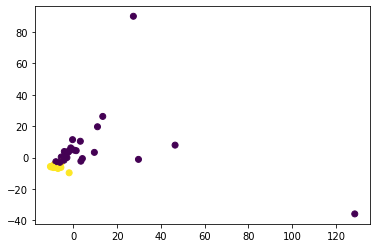

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(Xpca[:,0],Xpca[:,1],c=doc_ids)

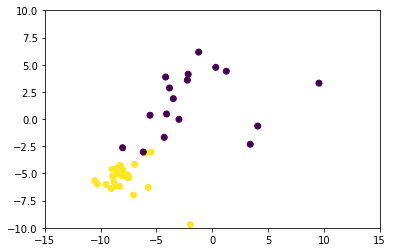

In [14]:
fig, ax = plt.subplots()
ax.set_xlim(-15, 15)
ax.set_ylim(-10, 10)

plt.scatter(Xpca[:,0],Xpca[:,1],c=doc_ids)

## Term Frequency and Inverse Document Frequency (TF-IDF)
TF-IDF é uma técnica para quantificar a importância das palavra nos documentos.

**Nomenclatura**:
- t — palavra
- d — documento (conjunto de palavras)
- N — número de documentos

#### TF
TF mede a frequência de uma palavra em um documento. TF depende muito do tamanho do documento e da generalidade da palavra.

$$
TF(t,d)= \frac{\# t \mbox{ em } d}{\#\mbox{ palavras em } d} 
$$

#### IDF
IDF mede o quão informativa cada palavra é no conjunto de documentos. Uma palavra que aparece frequentemente em muitos documentos não é útil para discriminar os documentos, portanto seu IDF deve ser próximo de zero.

$$
IDF(t) = \frac{N}{\# t \mbox{ em todos os documentos}}
$$

Combinando tudo temos:

$$
TFIDF(t,d) = TF(t,d)*\log(IDF(t))
$$

In [15]:
X = BoW.values

# calculando o IDF das palavras
idf = X.shape[0]/np.sum(X,axis=0)
print(idf.shape)

# calculando TF
X_tf = np.apply_along_axis(lambda x: x/np.sum(x),1,X)
print(X_tf.shape)

# calculando TF-IDF
X_tfidf = np.apply_along_axis(lambda x: x*np.log(idf),1,X_tf)
print(X_tfidf.shape)

(3319,)
(54, 3319)
(54, 3319)


(54, 2)


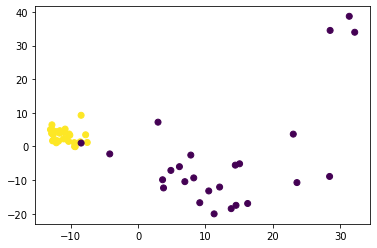

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X_tfidf)

pca_obj = PCA(n_components=2)
Xpca = pca_obj.fit_transform(X)

print(Xpca.shape)

fig, ax = plt.subplots()
#ax.set_xlim(-15,20)
#ax.set_ylim(-20,20)
plt.scatter(Xpca[:,0],Xpca[:,1],c=doc_ids)